### Logistic Regression for Binary Classification.

**Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Data Set

**Iris** data set with only 2 classes.

In [2]:
df = pd.read_csv('../Data/Iris2.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


**Target vector** has well balanced class distribution.

In [3]:
df['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

**Split** the data set into **train** set and **test** set ( 75% - 25% )

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], 
                                                    df['target'], 
                                                    random_state=0)

### Standardize the Data

- Logistic Regression is effected by **scale**. 
- Transformation ( **Standardization** ) brings all the data to same unit scale ( Mean = 0 and Std = 1 )
- Apply **fit_transform** on train set ( Learn the parameter for scaling ) and only apply **transform** on test set. 

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Statistics**

In [6]:
print(f'Mean : {scaler.mean_}')
print(f'Variance : {scaler.var_}')
print(f'Scale : {scaler.scale_}')
print(f'Number of features : {scaler.n_features_in_}')
print(f'Number of samples : {scaler.n_samples_seen_}') # 75 out of 100 is seen by Train Set
print(f'Parameters : {scaler.get_params()}')

Mean : [4.9]
Variance : [0.68373333]
Scale : [0.82688169]
Number of features : 1
Number of samples : 75
Parameters : {'copy': True, 'with_mean': True, 'with_std': True}


**Logistic Regression**

**Train** the model on data | Model **learn** from data.

In [7]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Get **default parameters**

In [8]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Prediction** for one onservation.

In [9]:
f'Prediction for One Observation : {X_test[0].reshape(-1,1)}'

'Prediction for One Observation : [[-0.12093628]]'

**Prediction** and **Probability** for one flower sample.

In [10]:
print(f'Prediction : {clf.predict(X_test[0].reshape(-1,1))[0]}')
print(f'Probability : {clf.predict_proba(X_test[0].reshape(-1,1))}')

Prediction : 0
Probability : [[0.52720087 0.47279913]]


**Classes** of the target vector.

In [11]:
clf.classes_

array([0, 1], dtype=int64)

**Probabilty** of **0** is more therefore it belongs to **class 0**.

In [12]:
df_test = pd.DataFrame()
df_test.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
df_test.loc[:, 'target'] = y_test.values
df_test['logistic predictions (0)'] = pd.DataFrame(clf.predict_proba(X_test))[0]
df_test['logistic predictions (1)'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [13]:
df_test.head()

,petal length (cm),target,logistic predictions (0),logistic predictions (1)
0,-0.120936,0,0.527201,0.472799
1,0.846554,1,0.049342,0.950658
2,0.000000,0,0.431803,0.568197
3,2.055917,1,0.001121,0.998879
4,1.330299,1,0.011074,0.988926


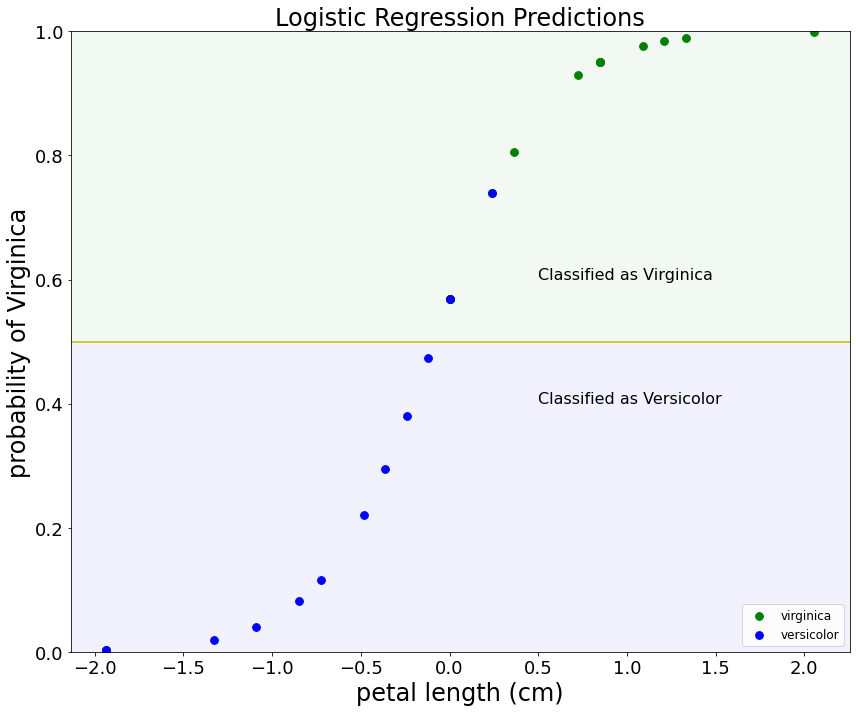

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

virginica = df_test['target'] == 1
versicolor = df_test['target'] == 0

ax.scatter(df_test.loc[virginica, 'petal length (cm)'].values, 
           df_test.loc[virginica, 'logistic predictions (1)'].values, 
           color='g', 
           s=60, 
           label='virginica')

ax.scatter(df_test.loc[versicolor, 'petal length (cm)'].values, 
           df_test.loc[versicolor, 'logistic predictions (1)'].values, 
           color='b', 
           s=60, 
           label='versicolor')

ax.axhline(y = 0.5, c='y') # Horizontal Line

ax.axhspan(0.5, 1, alpha=0.05, color='green')
ax.axhspan(0, 0.4999, alpha=0.05, color='blue')
ax.text(0.5, 0.6, 'Classified as Virginica', fontsize=16)
ax.text(0.5, 0.4, 'Classified as Versicolor', fontsize=16)

ax.set_ylim(0,1)
ax.legend(loc='lower right', markerscale=1.0, fontsize=12)
ax.tick_params(labelsize=18)
ax.set_xlabel('petal length (cm)', fontsize=24)
ax.set_ylabel('probability of Virginica', fontsize=24)
ax.set_title('Logistic Regression Predictions', fontsize=24)
fig.tight_layout()

Check model performance ( **Accuracy** )

In [15]:
score = clf.score(X_test, y_test)
print(f'Test Set Accuracy : {score*100:.2f}%')

Test Set Accuracy : 88.00%


**Confusion Matrix**

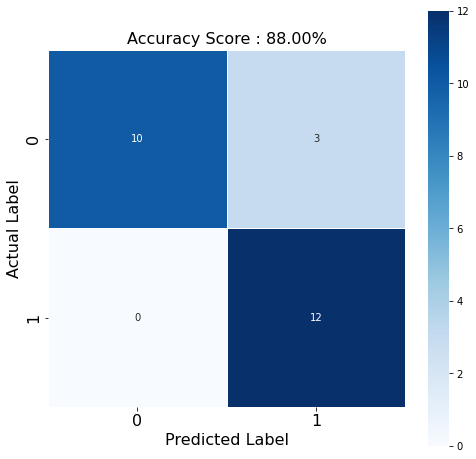

In [16]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues')
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('Actual Label', fontsize=16)
plt.title(f'Accuracy Score : {score*100:.2f}%', size=16)
plt.tick_params(labelsize=16);